<a href="https://colab.research.google.com/github/koalalovepabro/Stock-Portfolio-Optimization/blob/main/Test/Stock_Portfolio(custom)_ver1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📈 종목선택 방법**
- 사용자가 원하는 특정 종목으로 구성

# **📊 포트폴리오 최적화 방법**  
1. **✔ Max Sharpe Ratio** : 샤프비율이 최대가 되도록 포트폴리오 최적화  
    => 수익률과 변동성을 모두 고려
2. **Efficient Risk**   : 주어진 변동성 ( target_volatility ) 보다 낮은 범위 내에서 수익률 (Return)이 최대가 되도록 포트폴리오 최적화  
    => 높은 이익을 추구하기 보다는, 비교적 위험이 낮은 투자를 원하는 투자자에게 추천
3. **Efficient Return** : 주어진 리스크 ( target_return )을 만족시키는 선에서 변동성(volatility)를 최소가 되도록 포트폴리오 최적화  
    => 높은 위험을 감수하더라도, 높은 이익을 추구하는 투자 성향을 가진 투자자에게 추천

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
!pip install -q install finance-datareader

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import datetime
import requests

In [ ]:
# 국내 종목(삼성전자, SK하이닉스, 카카오, NAVER, LG화학 )

assets =  ['005930', '000660', '035720', '035420', '051910']

In [ ]:
len(assets)

5

### 종목코드와 종목이름을 딕셔너리로 저장

In [ ]:
###########추가#############
kospi_temp = fdr.StockListing('KOSPI')[['Symbol', 'Name']]
kosdaq_temp = fdr.StockListing('KOSDAQ')[['Symbol', 'Name']]
code_name_dict = pd.concat([kospi_temp,kosdaq_temp])
code_name_dict = code_name_dict.set_index('Symbol').to_dict().get('Name')
code_name_dict

{'095570': 'AJ네트웍스',
 '006840': 'AK홀딩스',
 '152100': 'ARIRANG 200',
 '295820': 'ARIRANG 200동일가중',
 '253150': 'ARIRANG 200선물레버리지',
 '253160': 'ARIRANG 200선물인버스2X',
 '395750': 'ARIRANG ESG가치주액티브',
 '395760': 'ARIRANG ESG성장주액티브',
 '278420': 'ARIRANG ESG우수기업',
 '292750': 'ARIRANG KRX300',
 '309210': 'ARIRANG KRX300헬스케어',
 '333940': 'ARIRANG KS로우볼가중TR',
 '333950': 'ARIRANG KS로우사이즈가중TR',
 '333960': 'ARIRANG KS모멘텀가중TR',
 '333970': 'ARIRANG KS밸류가중TR',
 '333980': 'ARIRANG KS퀄리티가중TR',
 '269530': 'ARIRANG S&P글로벌인프라',
 '251590': 'ARIRANG 고배당저변동50',
 '161510': 'ARIRANG 고배당주',
 '251600': 'ARIRANG 고배당주채권혼합',
 '289670': 'ARIRANG 국채선물10년',
 '298340': 'ARIRANG 국채선물3년',
 '189400': 'ARIRANG 글로벌MSCI(합성 H)',
 '278620': 'ARIRANG 단기채권액티브',
 '269540': 'ARIRANG 미국S&P500(H)',
 '287180': 'ARIRANG 미국나스닥기술주',
 '213630': 'ARIRANG 미국다우존스고배당주(합성 H)',
 '332610': 'ARIRANG 미국단기우량회사채',
 '332620': 'ARIRANG 미국장기우량회사채',
 '195970': 'ARIRANG 선진국MSCI(합성 H)',
 '238670': 'ARIRANG 스마트베타Quality채권혼합',
 '195980': 'ARIRANG 신흥국MSCI(합성 H

### 3년치 주가 데이터 가져오기

In [ ]:
# 종목별 종가 가져오기
from datetime import datetime

#시작일
start_date = '2018-07-19'

# today = datetime.today().strftime('%Y-%m-%d')
end_date = '2021-07-19'

# 각 주식의 일별 종가 데이터를 저장할 데이터 프레임을 생성
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

# FinanceDataReader로 각 종목의 종가데이터 불러오기
for stock in assets:
  df[stock] = fdr.DataReader(stock, start_date, end_date)['Close']
df

,005930,000660,035720,035420,051910
Date,,,,,
2018-07-19,46900,90300,22881,153217,336000
2018-07-20,47450,87900,23082,154218,332500
2018-07-23,46500,81700,23182,155019,333000
2018-07-24,46150,83600,23483,149211,330500
2018-07-25,46150,80500,23684,149411,361500
...,...,...,...,...,...
2021-07-13,79800,123000,161000,441000,840000
2021-07-14,79500,123500,162000,444000,844000
2021-07-15,80600,123500,159500,449000,818000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 740 entries, 2018-07-19 to 2021-07-19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   005930  740 non-null    int64
 1   000660  740 non-null    int64
 2   035720  740 non-null    int64
 3   035420  740 non-null    int64
 4   051910  740 non-null    int64
dtypes: int64(5)
memory usage: 34.7 KB


In [ ]:
df.isnull().sum()

005930    0
000660    0
035720    0
035420    0
051910    0
dtype: int64

In [ ]:
# 결측값 있는 열 삭제 
df2 = df.dropna(axis = 1)
df2

,005930,000660,035720,035420,051910
Date,,,,,
2018-07-19,46900,90300,22881,153217,336000
2018-07-20,47450,87900,23082,154218,332500
2018-07-23,46500,81700,23182,155019,333000
2018-07-24,46150,83600,23483,149211,330500
2018-07-25,46150,80500,23684,149411,361500
...,...,...,...,...,...
2021-07-13,79800,123000,161000,441000,840000
2021-07-14,79500,123500,162000,444000,844000
2021-07-15,80600,123500,159500,449000,818000


### 종목별 연평균 기대수익률 & 일간수익률의 공분산

In [ ]:
!pip install PyPortfolioOpt

     |████████████████████████████████| 60 kB 3.1 MB/s 
     |████████████████████████████████| 2.7 MB 10.8 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
# Optimize the portfolio
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

#### ver01> 종가에 결측값이 있는 종목을 삭제하지 않은 df로 포트폴리오 구성 ( 5개 종목 )

In [ ]:
# Calculate the expected annualized returns
# 복리 연평균 수익률
# return (1 + returns).prod() ** (frequency / returns.count()) - 1
mu = expected_returns.mean_historical_return(df)

# Calculate the annualized sample covariance matrix of the daily asset returns
S = risk_models.sample_cov(df)

In [ ]:
mu

005930    0.194596
000660    0.098682
035720    0.915864
035420    0.436265
051910    0.355593
dtype: float64

In [ ]:
len(mu)

5

In [ ]:
S

,005930,000660,035720,035420,051910
005930,0.073104,0.073651,0.027667,0.030521,0.048315
000660,0.073651,0.145887,0.034871,0.040453,0.057531
035720,0.027667,0.034871,0.128514,0.072360,0.055423
035420,0.030521,0.040453,0.072360,0.131487,0.046115
051910,0.048315,0.057531,0.055423,0.046115,0.185595


In [ ]:
len(S)

5

In [ ]:
S.shape

(5, 5)

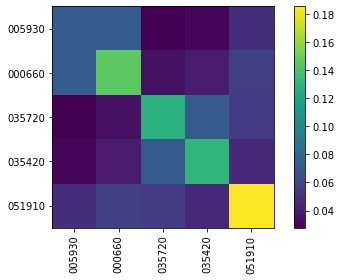

In [ ]:
# 수익률의 공분산
from pypfopt import plotting

plotting.plot_covariance(S)

#### ver02> 종가에 결측값이 있는 종목을 삭제한 df2로 포트폴리오 구성 ( 5개 종목 ) => df와 동일 종목

In [ ]:
# Calculate the expected annualized returns
# 복리 연평균 수익률
# return (1 + returns).prod() ** (frequency / returns.count()) - 1
mu2 = expected_returns.mean_historical_return(df2) 

# Calculate the annualized sample covariance matrix of the daily asset returns
S2 = risk_models.sample_cov(df2)

In [ ]:
mu2

005930    0.194596
000660    0.098682
035720    0.915864
035420    0.436265
051910    0.355593
dtype: float64

In [ ]:
len(mu2)

5

In [ ]:
S2.shape

(5, 5)

In [ ]:
len(S2)

5

In [ ]:
S2

,005930,000660,035720,035420,051910
005930,0.073104,0.073651,0.027667,0.030521,0.048315
000660,0.073651,0.145887,0.034871,0.040453,0.057531
035720,0.027667,0.034871,0.128514,0.072360,0.055423
035420,0.030521,0.040453,0.072360,0.131487,0.046115
051910,0.048315,0.057531,0.055423,0.046115,0.185595


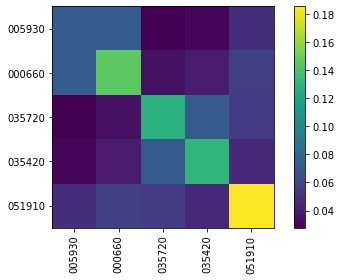

In [ ]:
# 수익률의 공분산
from pypfopt import plotting

plotting.plot_covariance(S2)

# 포트폴리오 최적화 ( Max Sharpe ratio )

#### ver01> 결측값 삭제하지 않음 / df / mu, S / ef, cleaned_weights ( 5개 종목 )

In [ ]:
!pip install PyPortfolioOpt

In [ ]:
import pypfopt
pypfopt.__version__

'1.4.2'

In [ ]:
# Efficient_risk로 최적화 했을때의 결과 확인
vol_limit = 0.3
ef = EfficientFrontier(mu, S)
ef.efficient_risk(vol_limit)
ef.portfolio_performance(verbose=True)

Expected annual return: 75.1%
Annual volatility: 30.0%
Sharpe Ratio: 2.44


(0.7507075730840602, 0.29999999998539145, 2.4356919103988073)

In [ ]:
# max_sharpe로 최적화 했을때의 결과 확인
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
ef.portfolio_performance(verbose=True)

Expected annual return: 91.6%
Annual volatility: 35.8%
Sharpe Ratio: 2.50


(0.9158641499574108, 0.3584883585768835, 2.4990048589409875)

In [ ]:
# Max Sharpe Ratio
ef = EfficientFrontier(mu, S)  # Create the Efficient Frontier Object

weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(cleaned_weights)

# calculates the expected return, volatility and Sharpe ratio for the optimized portfolio.
ef.portfolio_performance(verbose=True)

OrderedDict([('005930', 0.0), ('000660', 0.0), ('035720', 1.0), ('035420', 0.0), ('051910', 0.0)])
Expected annual return: 91.6%
Annual volatility: 35.8%
Sharpe Ratio: 2.50


(0.9158641499574108, 0.3584883585768835, 2.4990048589409875)

In [ ]:
weights

OrderedDict([('005930', 1.061729e-09),
             ('000660', -2.650441e-10),
             ('035720', 0.9999999995801676),
             ('035420', 1.298104e-10),
             ('051910', 5.36443e-11)])

In [ ]:
len(weights)

5

In [ ]:
cleaned_weights

OrderedDict([('005930', 0.0),
             ('000660', 0.0),
             ('035720', 1.0),
             ('035420', 0.0),
             ('051910', 0.0)])

In [ ]:
len(cleaned_weights)

5

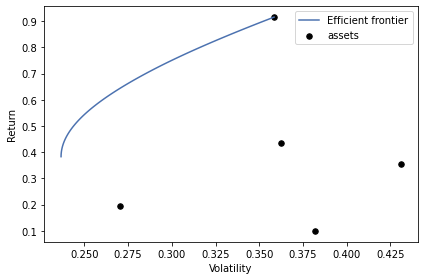

In [ ]:
# 효율적 투자선와 각 종목의 수익률 & 변동성
import matplotlib.pyplot as plt

ef = EfficientFrontier(mu, S, solver='SCS')

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.legend(loc='best')
plt.show()

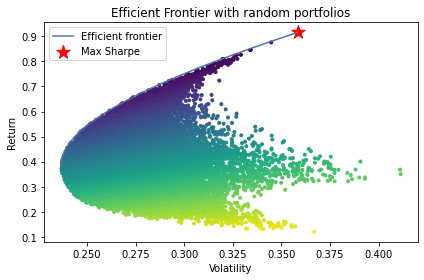

In [ ]:
# Show Efficient Frontier
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()  # 기대수익률 , Risk(변동성)
ax.scatter(std_tangent, ret_tangent, marker="*", s=200, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 20000
w = np.random.dirichlet(np.ones(len(mu)), n_samples) # 난수로 20000세트의 투자비중 만들기
rets = w.dot(mu)                                     # 기대수익률
stds = np.sqrt(np.diag(w @ S @ w.T))                 # Risk(변동성)
sharpes = rets / stds                                # 샤프비율

ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend(loc='best')
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

In [ ]:
# Max.Sharpe Ratio로 최적화한 포트폴리오의 수익률과 변동성, 샤프비율
ef.portfolio_performance(verbose=True)

Expected annual return: 91.6%
Annual volatility: 35.8%
Sharpe Ratio: 2.50


(0.9158641496611243, 0.3584883584667833, 2.4990048588820017)

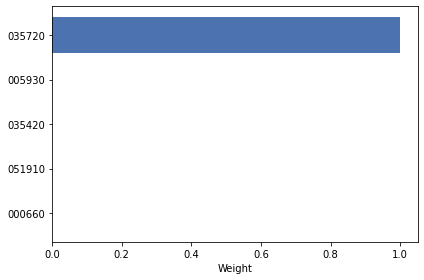

In [ ]:
# 종목별 투자비중
plotting.plot_weights(weights, ax=None)

#### ver02> 결측값 삭제 / df2 / mu2, S2 / ef2, cleaned_weights2 ( 5개 종목 )

In [ ]:
# Efficient_risk로 최적화 했을때의 결과 확인
vol_limit2 = 0.3
ef2 = EfficientFrontier(mu2, S2)
ef2.efficient_risk(vol_limit2)
ef2.portfolio_performance(verbose=True)

Expected annual return: 75.1%
Annual volatility: 30.0%
Sharpe Ratio: 2.44


(0.7507075730840602, 0.29999999998539145, 2.4356919103988073)

In [ ]:
# max_sharpe로 최적화 했을때의 결과 확인
ef2 = EfficientFrontier(mu2, S2)
ef2.max_sharpe()
ef2.portfolio_performance(verbose=True)

Expected annual return: 91.6%
Annual volatility: 35.8%
Sharpe Ratio: 2.50


(0.9158641499574108, 0.3584883585768835, 2.4990048589409875)

In [ ]:
# Max Sharpe Ratio
ef2 = EfficientFrontier(mu2, S2)  # Create the Efficient Frontier Object

weights2 = ef2.max_sharpe()

cleaned_weights2 = ef2.clean_weights()
print(cleaned_weights2)

# calculates the expected return, volatility and Sharpe ratio for the optimized portfolio.
ef2.portfolio_performance(verbose=True)

OrderedDict([('005930', 0.0), ('000660', 0.0), ('035720', 1.0), ('035420', 0.0), ('051910', 0.0)])
Expected annual return: 91.6%
Annual volatility: 35.8%
Sharpe Ratio: 2.50


(0.9158641499574108, 0.3584883585768835, 2.4990048589409875)

In [ ]:
weights2

OrderedDict([('005930', 1.061729e-09),
             ('000660', -2.650441e-10),
             ('035720', 0.9999999995801676),
             ('035420', 1.298104e-10),
             ('051910', 5.36443e-11)])

In [ ]:
len(weights2)

5

In [ ]:
cleaned_weights2

OrderedDict([('005930', 0.0),
             ('000660', 0.0),
             ('035720', 1.0),
             ('035420', 0.0),
             ('051910', 0.0)])

In [ ]:
len(cleaned_weights2)

5

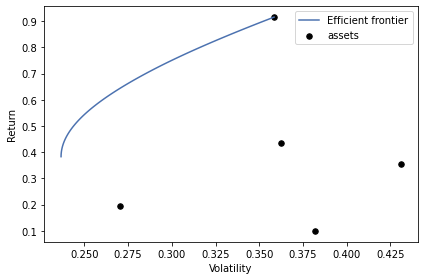

In [ ]:
# 효율적 투자선와 각 종목의 수익률 & 변동성
import matplotlib.pyplot as plt

ef2 = EfficientFrontier(mu2, S2, solver='SCS')

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef2, ax=ax, show_assets=True)
plt.legend(loc='best')
plt.show()

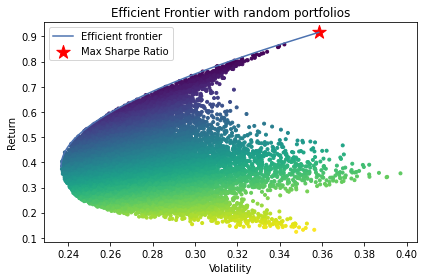

In [ ]:
# Show Efficient Frontier
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef2, ax=ax, show_assets=False)

# Find the tangency portfolio
ef2.max_sharpe()
ret_tangent2, std_tangent2, _ = ef2.portfolio_performance()  # 기대수익률 , Risk(변동성)
ax.scatter(std_tangent2, ret_tangent2, marker="*", s=200, c="r", label="Max Sharpe Ratio")

# Generate random portfolios
n_samples = 20000
w2 = np.random.dirichlet(np.ones(len(mu2)), n_samples) # 난수로 20000세트의 투자비중 만들기
rets2 = w2.dot(mu2)                                     # 기대수익률
stds2 = np.sqrt(np.diag(w2 @ S2 @ w2.T))                 # Risk(변동성)
sharpes2 = rets2 / stds2                                # 샤프비율

ax.scatter(stds2, rets2, marker=".", c=sharpes2, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend(loc='best')
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

In [ ]:
# Efficient Risk로 최적화한 포트폴리오의 수익률과 변동성, 샤프비율
ef2.portfolio_performance(verbose=True)

Expected annual return: 91.6%
Annual volatility: 35.8%
Sharpe Ratio: 2.50


(0.9158641496611243, 0.3584883584667833, 2.4990048588820017)

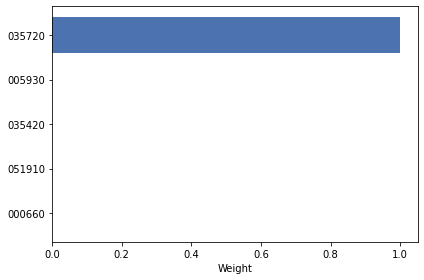

In [ ]:
# 종목별 투자비중
plotting.plot_weights(weights2, ax=None)

### 투자금액과 포트폴리오의 비중에 맞추어 수량 할당

In [ ]:
!pip install pulp

     |████████████████████████████████| 41.2 MB 73 kB/s 


#### ver01> 결측값 삭제하지 않음 / df / mu, S / ef, cleaned_weights ( 5개 종목 )

In [ ]:
# Get the discrete allocation of each sharpe per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

# 투자금액 (단위: KRW)
portfolio_val = 15000000

latest_prices = get_latest_prices(df)

weights = cleaned_weights

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=portfolio_val)

allocation, leftover = da.lp_portfolio(verbose=False)

print('Discrete Allocaion: ', allocation)
print('Funds Remaining: ', leftover, ' KRW')

rmse = da._allocation_rmse_error(verbose=False)

Discrete Allocaion:  {'035720': 97}
Funds Remaining:  62000.0  KRW
Allocation has RMSE: 0.000


In [ ]:
allocation

{'035720': 97}

In [ ]:
len(allocation)

1

#### ver02> 결측값 삭제 / df2 / mu2, S2 / ef2, cleaned_weights2 /  ( 5개 종목 )

In [ ]:
# Get the discrete allocation of each sharpe per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

# 투자금액 (단위: KRW)
portfolio_val = 15000000

latest_prices2 = get_latest_prices(df2)

weights2 = cleaned_weights2

da2 = DiscreteAllocation(weights2, latest_prices2, total_portfolio_value=portfolio_val)

allocation2, leftover2 = da2.lp_portfolio(verbose=False)

print('Discrete Allocaion: ', allocation2)
print('Funds Remaining: ', leftover2, ' KRW')

rmse2 = da2._allocation_rmse_error(verbose=False)

Discrete Allocaion:  {'035720': 97}
Funds Remaining:  62000.0  KRW
Allocation has RMSE: 0.000


In [ ]:
allocation2

{'035720': 97}

In [ ]:
len(allocation2)

1

### 포트폴리오 결과로 보여줄 변수 저장

#### ver01> 결측값 삭제하지 않음 ( 5개 종목 )

In [ ]:
# 각 종목별 실제 투자 금액
inv_total_price = {}

for i in allocation.keys():
  inv_total_price[i] = latest_prices.loc[i]*allocation[i]
inv_total_price

{'035720': 14938000}

In [ ]:
# 총 투자금액
investment = 0

for i in inv_total_price.values():
    investment += i
print(investment)

14938000


In [ ]:
portfolio_val-leftover

14938000.0

In [ ]:
# 각 종목별 실제 투자 비중
inv_total_weight = {}

for i in allocation.keys():
  inv_total_weight[i] = inv_total_price[i]/investment
inv_total_weight

{'035720': 1.0}

In [ ]:
# 투자비중의 합계
investment_w = 0

for i in inv_total_weight.values():
    investment_w += i
print(investment_w)

1.0


In [ ]:
# 결과값으로 불러올 값을 리스트로 저장
name_list = []                    # 종목명(회사이름)
total_price_stock =[]             # 각 종목별 실제 투자 금액
total_weight_stock = []           # 각 종목별 실제 투자 비중

for i in allocation.keys(): # i = 포트폴리오에 할당된 종목의 종목코드
    name_list.append(code_name_dict.get(i))
    total_price_stock.append(inv_total_price.get(i))
    total_weight_stock.append(inv_total_weight.get(i))

In [ ]:
name_list

['카카오']

In [ ]:
total_price_stock

[14938000]

In [ ]:
total_weight_stock

[1.0]

In [ ]:
# Get the discrete allocation values
discrete_allocation_list = []
for symbol in allocation:
  discrete_allocation_list.append(allocation.get(symbol))

In [ ]:
discrete_allocation_list

[97]

In [ ]:
# Create a dataframe for the portfolio
portfolio_df = pd.DataFrame(columns = ['종목명','종목코드','수량(주)', '투자금액(원)','투자비중'])
portfolio_df

,종목명,종목코드,수량(주),투자금액(원),투자비중


In [ ]:
# portfolio_df['Company_name'] = company_name
portfolio_df['종목명'] = name_list
portfolio_df['종목코드'] = allocation
portfolio_df['수량(주)'] = discrete_allocation_list
portfolio_df['투자금액(원)'] = total_price_stock
portfolio_df['투자비중'] = total_weight_stock

In [ ]:
portfolio_df

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,카카오,035720,97,14938000,1.0


In [ ]:
# Sort by allocation & Show the portfolio
portfolio_df_sorted = portfolio_df.sort_values('투자비중', ascending = False)
portfolio_df_sorted = portfolio_df_sorted.reset_index(drop=True)
portfolio_df_sorted

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,카카오,035720,97,14938000,1.0


### 투자 금액에 따라 최적화된 포트폴리오의 종목별 수량

In [ ]:
portfolio_df_sorted.loc["합계",2:] = portfolio_df_sorted.sum()
portfolio_df_sorted

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,카카오,035720,97.0,14938000.0,1.0
합계,NaN,NaN,97.0,14938000.0,1.0


#### ver02> 결측값 삭제 ( 5개 종목 )

In [ ]:
# 각 종목별 실제 투자 금액
inv_total_price2 = {}

for i in allocation2.keys():
  inv_total_price2[i] = latest_prices2.loc[i]*allocation2[i]
inv_total_price2

{'035720': 14938000}

In [ ]:
# 총 투자금액
investment2 = 0

for i in inv_total_price2.values():
    investment2 += i
print(investment2)

14938000


In [ ]:
portfolio_val-leftover2

14938000.0

In [ ]:
# 각 종목별 실제 투자 비중
inv_total_weight2 = {}

for i in allocation2.keys():
  inv_total_weight2[i] = inv_total_price2[i]/investment2
inv_total_weight2

{'035720': 1.0}

In [ ]:
# 투자비중의 합계
investment_w2 = 0

for i in inv_total_weight2.values():
    investment_w2 += i
print(investment_w2)

1.0


In [ ]:
# 결과값으로 불러올 값을 리스트로 저장
name_list2 = []                    # 종목명(회사이름)
total_price_stock2 =[]             # 각 종목별 실제 투자 금액
total_weight_stock2 = []           # 각 종목별 실제 투자 비중

for i in allocation2.keys(): # i = 포트폴리오에 할당된 종목의 종목코드
    name_list2.append(code_name_dict.get(i))
    total_price_stock2.append(inv_total_price2.get(i))
    total_weight_stock2.append(inv_total_weight2.get(i))

In [ ]:
name_list2

['카카오']

In [ ]:
total_price_stock2

[14938000]

In [ ]:
total_weight_stock2

[1.0]

In [ ]:
# Get the discrete allocation values
discrete_allocation_list2 = []
for symbol in allocation2:
  discrete_allocation_list2.append(allocation2.get(symbol))

In [ ]:
discrete_allocation_list2

[97]

In [ ]:
# Create a dataframe for the portfolio
portfolio_df2 = pd.DataFrame(columns = ['종목명','종목코드','수량(주)', '투자금액(원)','투자비중'])
portfolio_df2

,종목명,종목코드,수량(주),투자금액(원),투자비중


In [ ]:
# portfolio_df['Company_name'] = company_name
portfolio_df2['종목명'] = name_list2
portfolio_df2['종목코드'] = allocation2
portfolio_df2['수량(주)'] = discrete_allocation_list2
portfolio_df2['투자금액(원)'] = total_price_stock2
portfolio_df2['투자비중'] = total_weight_stock2

In [ ]:
portfolio_df2

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,카카오,035720,97,14938000,1.0


In [ ]:
# Sort by allocation & Show the portfolio
portfolio_df_sorted2 = portfolio_df2.sort_values('투자비중', ascending = False)
portfolio_df_sorted2 = portfolio_df_sorted2.reset_index(drop=True)
portfolio_df_sorted2

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,카카오,035720,97,14938000,1.0


### 투자 금액에 따라 최적화된 포트폴리오의 종목별 수량

In [ ]:
portfolio_df_sorted2.loc["합계",2:] = portfolio_df_sorted2.sum()
portfolio_df_sorted2

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,카카오,035720,97.0,14938000.0,1.0
합계,NaN,NaN,97.0,14938000.0,1.0


# 포트폴리오의 수익률과 변동성을 벤치마크지수(KOSPI)와 비교

#### ver01> 결측값 삭제 ( 5개 종목 )

In [ ]:
df

,005930,000660,035720,035420,051910
Date,,,,,
2018-07-19,46900,90300,22881,153217,336000
2018-07-20,47450,87900,23082,154218,332500
2018-07-23,46500,81700,23182,155019,333000
2018-07-24,46150,83600,23483,149211,330500
2018-07-25,46150,80500,23684,149411,361500
...,...,...,...,...,...
2021-07-13,79800,123000,161000,441000,840000
2021-07-14,79500,123500,162000,444000,844000
2021-07-15,80600,123500,159500,449000,818000


In [ ]:
cleaned_weights

OrderedDict([('005930', 0.0),
             ('000660', 0.0),
             ('035720', 1.0),
             ('035420', 0.0),
             ('051910', 0.0)])

In [ ]:
len(cleaned_weights)

5

In [ ]:
# 각 일자별, 종목별 종가에 해당 weights를 곱해주기
for i, weight in cleaned_weights.items():
    df[i] = df[i]*weight

In [ ]:
df

,005930,000660,035720,035420,051910
Date,,,,,
2018-07-19,0.0,0.0,22881.0,0.0,0.0
2018-07-20,0.0,0.0,23082.0,0.0,0.0
2018-07-23,0.0,0.0,23182.0,0.0,0.0
2018-07-24,0.0,0.0,23483.0,0.0,0.0
2018-07-25,0.0,0.0,23684.0,0.0,0.0
...,...,...,...,...,...
2021-07-13,0.0,0.0,161000.0,0.0,0.0
2021-07-14,0.0,0.0,162000.0,0.0,0.0
2021-07-15,0.0,0.0,159500.0,0.0,0.0


In [ ]:
# 일자별 종목의 (종가*비중) 합계를 Port열에 저장
df['Port'] = df.sum(axis = 1)
df

,005930,000660,035720,035420,051910,Port
Date,,,,,,
2018-07-19,0.0,0.0,22881.0,0.0,0.0,22881.0
2018-07-20,0.0,0.0,23082.0,0.0,0.0,23082.0
2018-07-23,0.0,0.0,23182.0,0.0,0.0,23182.0
2018-07-24,0.0,0.0,23483.0,0.0,0.0,23483.0
2018-07-25,0.0,0.0,23684.0,0.0,0.0,23684.0
...,...,...,...,...,...,...
2021-07-13,0.0,0.0,161000.0,0.0,0.0,161000.0
2021-07-14,0.0,0.0,162000.0,0.0,0.0,162000.0
2021-07-15,0.0,0.0,159500.0,0.0,0.0,159500.0


In [ ]:
# 일자별 종가의 전일대비 변동률(수익률)을 portfolio라는 데이터프레임으로 저장
portfolio = df[['Port']].pct_change()
portfolio

,Port
Date,
2018-07-19,NaN
2018-07-20,0.008785
2018-07-23,0.004332
2018-07-24,0.012984
2018-07-25,0.008559
...,...
2021-07-13,-0.006173
2021-07-14,0.006211
2021-07-15,-0.015432


In [ ]:
# 코스피지수 불러오기
kospi = fdr.DataReader('KS11', start_date, end_date)[['Close']]
kospi

,Close
Date,
2018-07-19,2282.29
2018-07-20,2289.19
2018-07-23,2269.31
2018-07-24,2280.20
2018-07-25,2273.03
...,...
2021-07-13,3271.38
2021-07-14,3264.81
2021-07-15,3286.22


In [ ]:
# 코스피지수의 변동률(수익률) 구하기
# 변동률(수익률) = (당일가격-전일가격) / 전일가격
# 7/20의 변동률(수익률) = (7/20 가격-7-19 가격) / 7/19 가격
kospi_pct = kospi.pct_change()
kospi_pct

,Close
Date,
2018-07-19,NaN
2018-07-20,0.003023
2018-07-23,-0.008684
2018-07-24,0.004799
2018-07-25,-0.003144
...,...
2021-07-13,0.007673
2021-07-14,-0.002008
2021-07-15,0.006558


In [ ]:
# 코스피와 포트폴리오 합치기
result = kospi_pct.join(portfolio)
result

,Close,Port
Date,,
2018-07-19,NaN,NaN
2018-07-20,0.003023,0.008785
2018-07-23,-0.008684,0.004332
2018-07-24,0.004799,0.012984
2018-07-25,-0.003144,0.008559
...,...,...
2021-07-13,0.007673,-0.006173
2021-07-14,-0.002008,0.006211
2021-07-15,0.006558,-0.015432


In [ ]:
# 1열을 0으로 
result.iloc[0] = 0
result

,Close,Port
Date,,
2018-07-19,0.000000,0.000000
2018-07-20,0.003023,0.008785
2018-07-23,-0.008684,0.004332
2018-07-24,0.004799,0.012984
2018-07-25,-0.003144,0.008559
...,...,...
2021-07-13,0.007673,-0.006173
2021-07-14,-0.002008,0.006211
2021-07-15,0.006558,-0.015432


In [ ]:
# 열 이름 변경
result.columns = ['KOSPI', 'PORTFOLIO']
result

,KOSPI,PORTFOLIO
Date,,
2018-07-19,0.000000,0.000000
2018-07-20,0.003023,0.008785
2018-07-23,-0.008684,0.004332
2018-07-24,0.004799,0.012984
2018-07-25,-0.003144,0.008559
...,...,...
2021-07-13,0.007673,-0.006173
2021-07-14,-0.002008,0.006211
2021-07-15,0.006558,-0.015432


In [ ]:
# 1에서 시작해서, 전일대비 변동률(수익률)을 적용하여 수치화하기
wealth = (1+result).cumprod()
wealth

,KOSPI,PORTFOLIO
Date,,
2018-07-19,1.000000,1.000000
2018-07-20,1.003023,1.008785
2018-07-23,0.994313,1.013155
2018-07-24,0.999084,1.026310
2018-07-25,0.995943,1.035095
...,...,...
2021-07-13,1.433376,7.036406
2021-07-14,1.430497,7.080110
2021-07-15,1.439878,6.970849


## 시각화

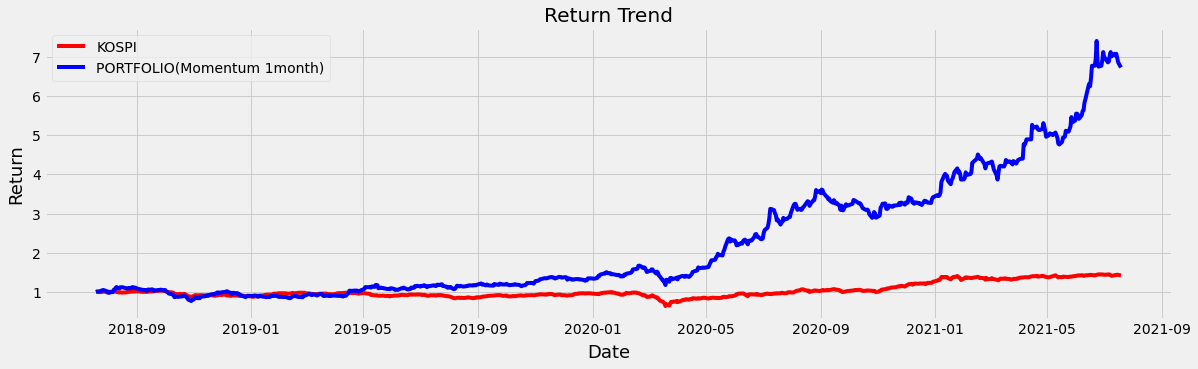

In [ ]:
# 포트폴리오와 KOSPI 지수의 '누적 수익률 추이'를 시각화하여 비교

# matplotlib.pyplot 스타일시트 설정
plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,5))
plt.plot(wealth.index, wealth.KOSPI , 'r', label='KOSPI')
plt.plot(wealth.index, wealth.PORTFOLIO ,'b', label="PORTFOLIO(Momentum 1month)")
plt.grid(True)
plt.title('Return Trend')
plt.xlabel('Date',fontsize=18, labelpad=7)
plt.ylabel('Return',fontsize=18, labelpad=7)
plt.legend(loc='best')
plt.savefig("cust_sharpe_return.png", dpi=100)
plt.show()

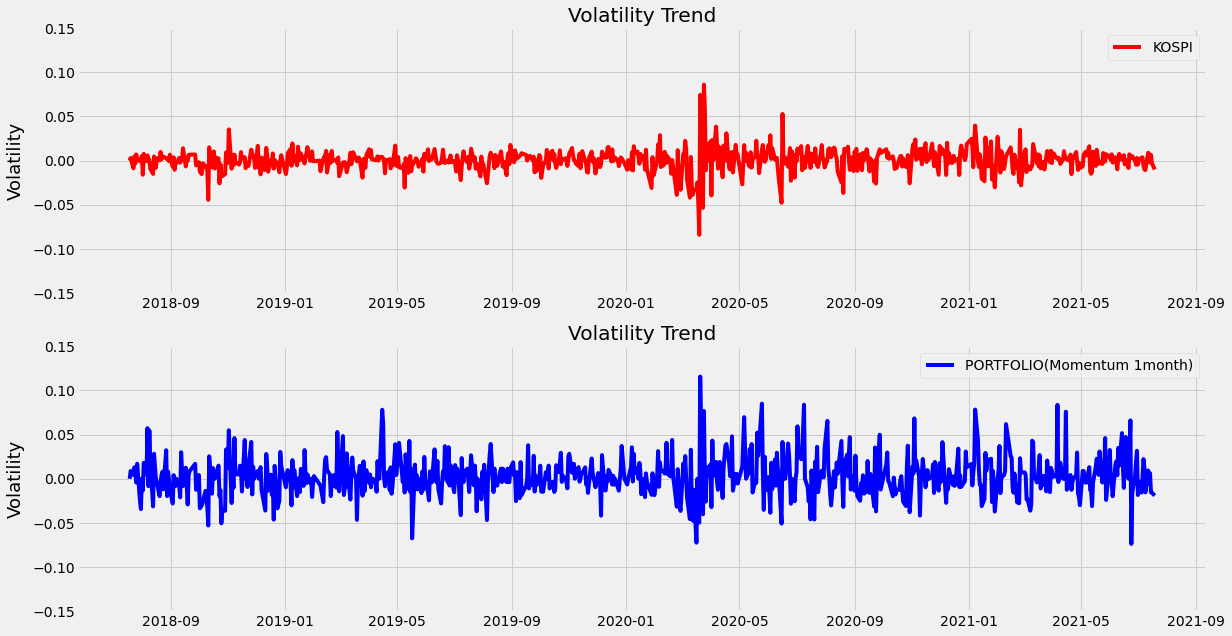

In [ ]:
# 변동률 비교
plt.figure(figsize=(18,10))

plt.subplot(2,1,1)
plt.title('Volatility Trend')

plt.plot(result.index, result.KOSPI , 'r', label='KOSPI')
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.grid(True)
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.title('Volatility Trend')
plt.plot(result.index, result.PORTFOLIO ,'b', label="PORTFOLIO(Momentum 1month)")
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.grid(True)
plt.savefig("custom_sharpe_volatility.png", dpi=100)
plt.show()

In [ ]:
print('----- Customized portfolio performance -----')
# Show Funds
print('Funds:', portfolio_val, 'KRW')

# Show Funds Remaining
print('Funds Remaining: ', leftover, ' KRW')

# Show Portfolio performance
ef.portfolio_performance(verbose=True)
rmse = da._allocation_rmse_error(verbose=False)

----- Customized portfolio performance -----
Funds: 15000000 KRW
Funds Remaining:  62000.0  KRW
Expected annual return: 91.6%
Annual volatility: 35.8%
Sharpe Ratio: 2.50
Allocation has RMSE: 0.000


#### ver02> 결측값 삭제 ( 22개 종목 )

In [ ]:
df2

,005930,000660,035720,035420,051910
Date,,,,,
2018-07-19,46900,90300,22881,153217,336000
2018-07-20,47450,87900,23082,154218,332500
2018-07-23,46500,81700,23182,155019,333000
2018-07-24,46150,83600,23483,149211,330500
2018-07-25,46150,80500,23684,149411,361500
...,...,...,...,...,...
2021-07-13,79800,123000,161000,441000,840000
2021-07-14,79500,123500,162000,444000,844000
2021-07-15,80600,123500,159500,449000,818000


In [ ]:
cleaned_weights2

OrderedDict([('005930', 0.0),
             ('000660', 0.0),
             ('035720', 1.0),
             ('035420', 0.0),
             ('051910', 0.0)])

In [ ]:
len(cleaned_weights2)

5

In [ ]:
# 각 일자별, 종목별 종가에 해당 weights를 곱해주기
for i, weight in cleaned_weights2.items():
    df2[i] = df2[i]*weight

In [ ]:
df2

,005930,000660,035720,035420,051910
Date,,,,,
2018-07-19,0.0,0.0,22881.0,0.0,0.0
2018-07-20,0.0,0.0,23082.0,0.0,0.0
2018-07-23,0.0,0.0,23182.0,0.0,0.0
2018-07-24,0.0,0.0,23483.0,0.0,0.0
2018-07-25,0.0,0.0,23684.0,0.0,0.0
...,...,...,...,...,...
2021-07-13,0.0,0.0,161000.0,0.0,0.0
2021-07-14,0.0,0.0,162000.0,0.0,0.0
2021-07-15,0.0,0.0,159500.0,0.0,0.0


In [ ]:
# 일자별 종목의 (종가*비중) 합계를 Port열에 저장
df2['Port'] = df2.sum(axis = 1)
df2

,005930,000660,035720,035420,051910,Port
Date,,,,,,
2018-07-19,0.0,0.0,22881.0,0.0,0.0,22881.0
2018-07-20,0.0,0.0,23082.0,0.0,0.0,23082.0
2018-07-23,0.0,0.0,23182.0,0.0,0.0,23182.0
2018-07-24,0.0,0.0,23483.0,0.0,0.0,23483.0
2018-07-25,0.0,0.0,23684.0,0.0,0.0,23684.0
...,...,...,...,...,...,...
2021-07-13,0.0,0.0,161000.0,0.0,0.0,161000.0
2021-07-14,0.0,0.0,162000.0,0.0,0.0,162000.0
2021-07-15,0.0,0.0,159500.0,0.0,0.0,159500.0


In [ ]:
# 일자별 종가의 전일대비 변동률(수익률)을 portfolio라는 데이터프레임으로 저장
portfolio2 = df2[['Port']].pct_change()
portfolio2

,Port
Date,
2018-07-19,NaN
2018-07-20,0.008785
2018-07-23,0.004332
2018-07-24,0.012984
2018-07-25,0.008559
...,...
2021-07-13,-0.006173
2021-07-14,0.006211
2021-07-15,-0.015432


In [ ]:
# 코스피지수 불러오기
kospi = fdr.DataReader('KS11', start_date, end_date)[['Close']]
kospi

,Close
Date,
2018-07-19,2282.29
2018-07-20,2289.19
2018-07-23,2269.31
2018-07-24,2280.20
2018-07-25,2273.03
...,...
2021-07-13,3271.38
2021-07-14,3264.81
2021-07-15,3286.22


In [ ]:
# 코스피지수의 변동률(수익률) 구하기
# 변동률(수익률) = (당일가격-전일가격) / 전일가격
# 7/20의 변동률(수익률) = (7/20 가격-7-19 가격) / 7/19 가격
kospi_pct = kospi.pct_change()
kospi_pct

,Close
Date,
2018-07-19,NaN
2018-07-20,0.003023
2018-07-23,-0.008684
2018-07-24,0.004799
2018-07-25,-0.003144
...,...
2021-07-13,0.007673
2021-07-14,-0.002008
2021-07-15,0.006558


In [ ]:
# 코스피와 포트폴리오 합치기
result2 = kospi_pct.join(portfolio2)
result2

,Close,Port
Date,,
2018-07-19,NaN,NaN
2018-07-20,0.003023,0.008785
2018-07-23,-0.008684,0.004332
2018-07-24,0.004799,0.012984
2018-07-25,-0.003144,0.008559
...,...,...
2021-07-13,0.007673,-0.006173
2021-07-14,-0.002008,0.006211
2021-07-15,0.006558,-0.015432


In [ ]:
# 1열을 0으로 
result2.iloc[0] = 0
result2

,Close,Port
Date,,
2018-07-19,0.000000,0.000000
2018-07-20,0.003023,0.008785
2018-07-23,-0.008684,0.004332
2018-07-24,0.004799,0.012984
2018-07-25,-0.003144,0.008559
...,...,...
2021-07-13,0.007673,-0.006173
2021-07-14,-0.002008,0.006211
2021-07-15,0.006558,-0.015432


In [ ]:
# 열 이름 변경
result2.columns = ['KOSPI', 'PORTFOLIO']
result2

,KOSPI,PORTFOLIO
Date,,
2018-07-19,0.000000,0.000000
2018-07-20,0.003023,0.008785
2018-07-23,-0.008684,0.004332
2018-07-24,0.004799,0.012984
2018-07-25,-0.003144,0.008559
...,...,...
2021-07-13,0.007673,-0.006173
2021-07-14,-0.002008,0.006211
2021-07-15,0.006558,-0.015432


In [ ]:
# 1에서 시작해서, 전일대비 변동률(수익률)을 적용하여 수치화하기
wealth2 = (1+result2).cumprod()
wealth2

,KOSPI,PORTFOLIO
Date,,
2018-07-19,1.000000,1.000000
2018-07-20,1.003023,1.008785
2018-07-23,0.994313,1.013155
2018-07-24,0.999084,1.026310
2018-07-25,0.995943,1.035095
...,...,...
2021-07-13,1.433376,7.036406
2021-07-14,1.430497,7.080110
2021-07-15,1.439878,6.970849


## 시각화

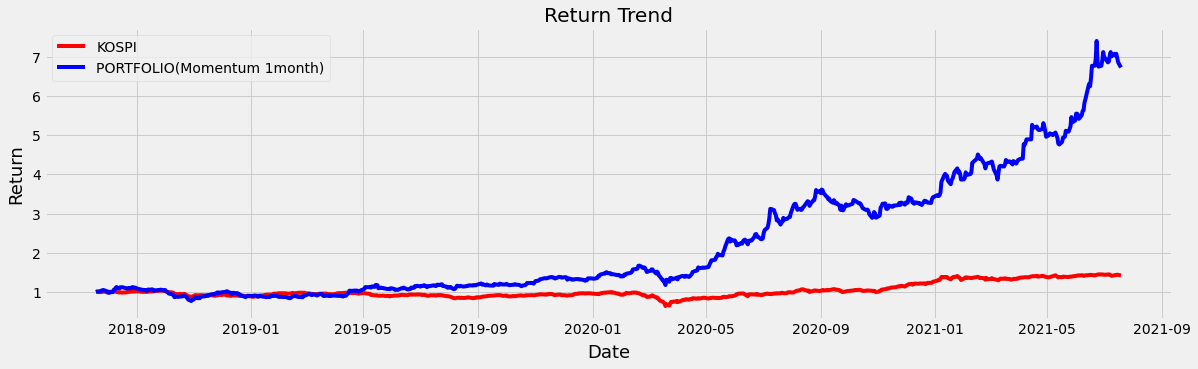

In [ ]:
# 포트폴리오와 KOSPI 지수의 '누적 수익률 추이'를 시각화하여 비교

# matplotlib.pyplot 스타일시트 설정
plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,5))
plt.plot(wealth2.index, wealth2.KOSPI , 'r', label='KOSPI')
plt.plot(wealth2.index, wealth2.PORTFOLIO ,'b', label="PORTFOLIO(Momentum 1month)")
plt.grid(True)
plt.title('Return Trend')
plt.xlabel('Date',fontsize=18, labelpad=7)
plt.ylabel('Return',fontsize=18, labelpad=7)
plt.legend(loc='best')
plt.savefig("cust_sharpe_return2.png", dpi=100)
plt.show()

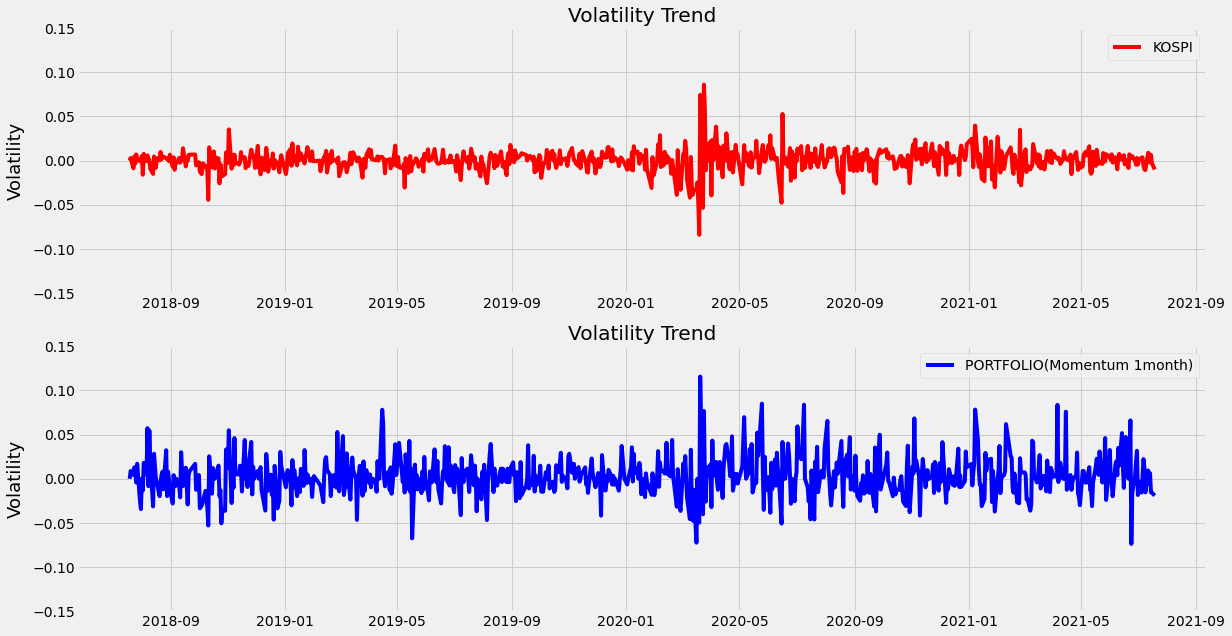

In [ ]:
# 변동률 비교
plt.figure(figsize=(18,10))

plt.subplot(2,1,1)
plt.title('Volatility Trend')

plt.plot(result2.index, result2.KOSPI , 'r', label='KOSPI')
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.grid(True)
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.title('Volatility Trend')
plt.plot(result2.index, result2.PORTFOLIO ,'b', label="PORTFOLIO(Momentum 1month)")
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.grid(True)
plt.savefig("cust_sharpe_volatility2.png", dpi=100)
plt.show()

In [ ]:
portfolio_df_sorted2

,종목명,종목코드,수량(주),투자금액(원),투자비중
0,카카오,035720,97.0,14938000.0,1.0
합계,NaN,NaN,97.0,14938000.0,1.0


In [ ]:
print('-----  Customized portfolio performance -----')
# Show Funds
print('Funds:', portfolio_val, 'KRW')

# Show Funds Remaining
print('Funds Remaining: ', leftover2, ' KRW')

# Show Portfolio performance
ef2.portfolio_performance(verbose=True)
rmse2 = da2._allocation_rmse_error(verbose=False)

-----  Customized portfolio performance -----
Funds: 15000000 KRW
Funds Remaining:  62000.0  KRW
Expected annual return: 91.6%
Annual volatility: 35.8%
Sharpe Ratio: 2.50
Allocation has RMSE: 0.000
